In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
file_path = "E:\School\Dataset\data.csv"  # Update this path to the actual location of your CSV file
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10004\3821702436.py:9: SyntaxWarning: invalid escape sequence '\S'
  file_path = "E:\School\Dataset\data.csv"  # Update this path to the actual location of your CSV file


In [2]:
# Step 2: Drop the 'IsHoliday' column and define independent (X) and dependent (y) variables
X = data.drop(columns=['Weekly_Sales', 'IsHoliday'])
y = data['Weekly_Sales']

# Step 3: Train/test split and train the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Try Random Forest for improved accuracy
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [4]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)

In [5]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 3280.13
MAE: 1551.66
MAPE: 955.58%


In [6]:
# Step 5: Get feature importance and associate them with column names
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the feature importance for each variable
print(coef_df)


        Variable  Importance
1           Dept    0.629570
2           Size    0.193323
0          Store    0.074506
10           CPI    0.036613
3    Temperature    0.019475
11  Unemployment    0.017696
4     Fuel_Price    0.014054
7      MarkDown3    0.006885
6      MarkDown2    0.002228
9      MarkDown5    0.002010
8      MarkDown4    0.001966
5      MarkDown1    0.001676


In [7]:
# Step 6: Predict sales for Store 1 and Dept 1
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]
X_store_dept = store_1_dept_1.drop(columns=['Weekly_Sales', 'IsHoliday'])

# Predict sales for Store 1 and Dept 1
store_dept_sales_pred = model.predict(X_store_dept)

# Actual sales for Store 1 and Dept 1
store_dept_sales_actual = store_1_dept_1['Weekly_Sales']

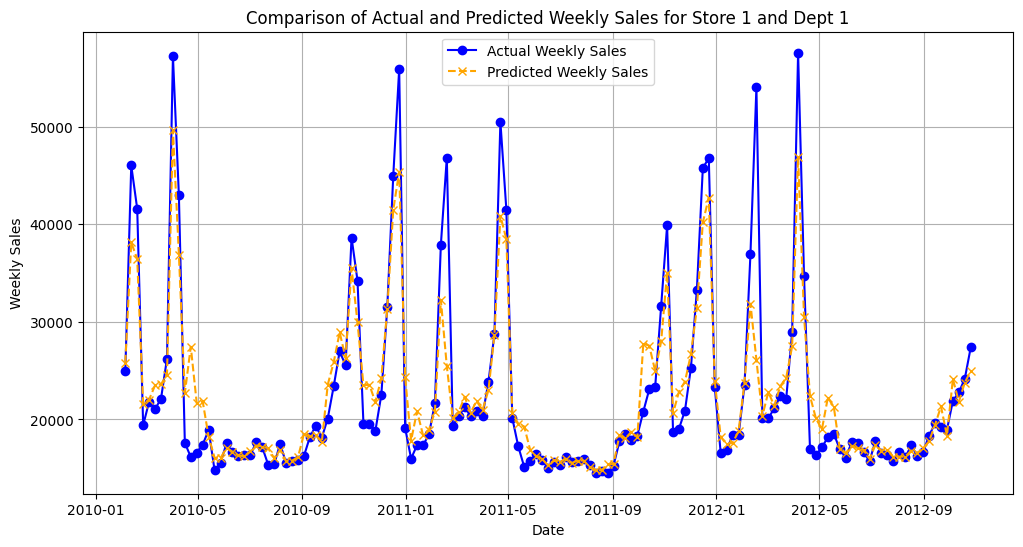

In [8]:
# Step 7: Plot actual vs predicted sales for Store 1 and Dept 1
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual and Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

In [18]:
from datetime import timedelta

# Step 8: Predict the next 5 weeks using rolling predictions
num_weeks_to_predict = 5
predicted_weeks = []
predicted_sales = []

# Get the last 10 weeks of data for the initial prediction
rolling_data = store_1_dept_1.iloc[-10:].copy()

# Loop to predict the next 5 weeks
for i in range(num_weeks_to_predict):
    # Drop 'Weekly_Sales' and 'IsHoliday' columns for prediction input
    X_rolling = rolling_data.drop(columns=['Weekly_Sales', 'IsHoliday'])

    # Predict sales for the next week using the model
    next_week_pred = model.predict(X_rolling)

    # Get the predicted value for the next week
    predicted_next_week_sales = next_week_pred[0]

    # Append the prediction to the results list
    predicted_sales.append(predicted_next_week_sales)
    
    # Calculate the next week's date
    next_week_date = rolling_data.index[-1] + timedelta(weeks=1)
    predicted_weeks.append(next_week_date)
    
    # Print the predicted value for this week
    print(f"Predicted sales for the week starting on {next_week_date.strftime('%Y-%m-%d')}: {predicted_next_week_sales:.2f}")
    
    # Update rolling_data: add the new predicted week and remove the oldest week
    # Create a new row with the predicted value (placeholders for other features if needed)
    new_row = rolling_data.iloc[-1:].copy()
    new_row.index = [next_week_date]
    new_row['Weekly_Sales'] = predicted_next_week_sales
    rolling_data = pd.concat([rolling_data, new_row]).iloc[1:]  # Shift the rolling window



Predicted sales for the week starting on 2012-11-02: 16551.97
Predicted sales for the week starting on 2012-11-09: 17051.35
Predicted sales for the week starting on 2012-11-16: 17760.76
Predicted sales for the week starting on 2012-11-23: 19443.90
Predicted sales for the week starting on 2012-11-30: 21330.17


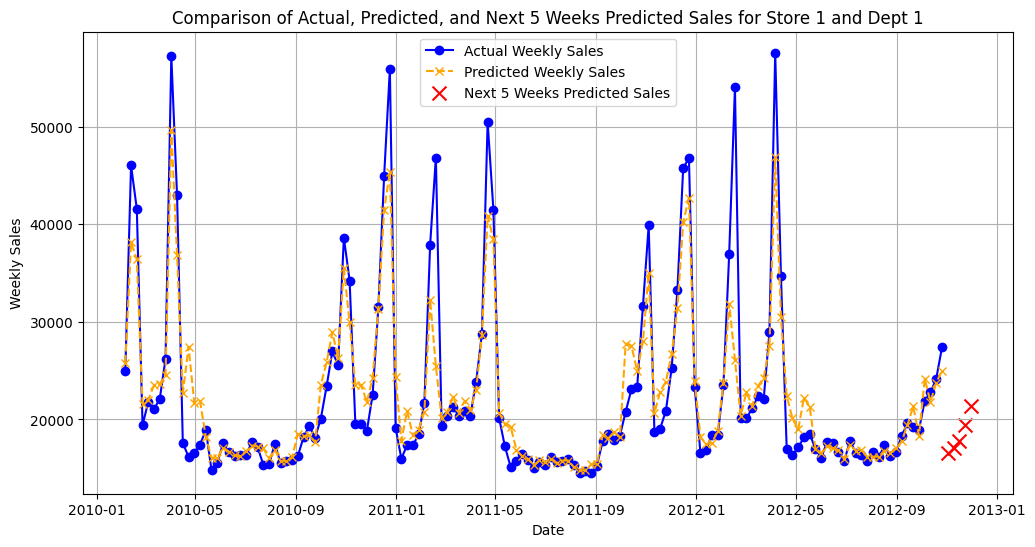


Final Predictions for the next 5 weeks:
Week starting 2012-11-02: Predicted Sales = 16551.97
Week starting 2012-11-09: Predicted Sales = 17051.35
Week starting 2012-11-16: Predicted Sales = 17760.76
Week starting 2012-11-23: Predicted Sales = 19443.90
Week starting 2012-11-30: Predicted Sales = 21330.17


In [19]:
# Step 9: Plot actual, predicted, and future predicted sales including the 5 predicted weeks
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.scatter(predicted_weeks, predicted_sales, color='red', marker='x', s=100, label='Next 5 Weeks Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual, Predicted, and Next 5 Weeks Predicted Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()

plt.show()

# Print all predicted sales for the next 5 weeks at the end
print("\nFinal Predictions for the next 5 weeks:")
for week, sales in zip(predicted_weeks, predicted_sales):
    print(f"Week starting {week.strftime('%Y-%m-%d')}: Predicted Sales = {sales:.2f}")